A simple demo to use the pre-trained model for denoising an image

In [1]:
import os
import sys
import numpy as np
import skimage.io
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import BMCNN
sys.path.append(ROOT_DIR)
from bmcnn import utils
import bmcnn.model as nmodel

#loading denoiser model
denoiser = nmodel.ImageDenoiser(os.path.abspath("../savedmodels/model_ver1.0.h5"))


Using TensorFlow backend.


In [2]:
# Visualize before and after images
def visualize_image(img_n, im_den, psnr_n, psnr_d):
    """
    img_n: noisy image
    im_den: denoised image
    psnr_n: pnsr of noisy image
    psnr_d : pnsr of denoised image
    """
    plt.figure(figsize=(14, 14))
    plt.subplot(1, 2, 1)
    plt.title("Noisy image PSNR = %2.2f dB"%psnr_n, fontsize=10)
    plt.axis('off')
    if img_n.ndim == 2:
        if np.max(img_n)>1:
            img_n = img_n/255.0
        plt.imshow(skimage.color.gray2rgb(img_n))
    else:
        plt.imshow(img_n)
    
    plt.subplot(1, 2, 2)
    plt.title("Denoised image PSNR = %2.2f dB"%psnr_d, fontsize=10)
    plt.axis('off')
    if img_n.ndim == 2:
        if np.max(img_n)>1:
            im_den = im_den/255.0
        plt.imshow(skimage.color.gray2rgb(im_den))
    else:
        plt.imshow(im_den)

    plt.show()


## Sample 1: adding noise and denoising a color image 

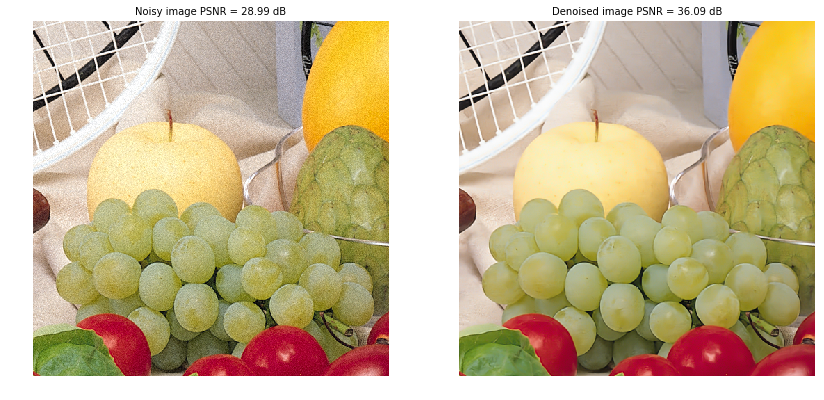

In [3]:
reference_image = '../testdata/fruits.png'


sigma = 8
img_ref = skimage.io.imread(reference_image)
img_n = utils.addNoise(img_ref, sigma)

im_out = denoiser.run(img_n, sigma)

_, psnr_n =  utils.mse_psnr(img_ref, img_n)
_, psnr_d =  utils.mse_psnr(img_ref, im_out)

visualize_image(img_n, im_out, psnr_n, psnr_d)

skimage.io.imsave('fruits_out.png', np.uint8(im_out*255+0.5))



## Sample 2: adding noise and denoising a grayscale image 

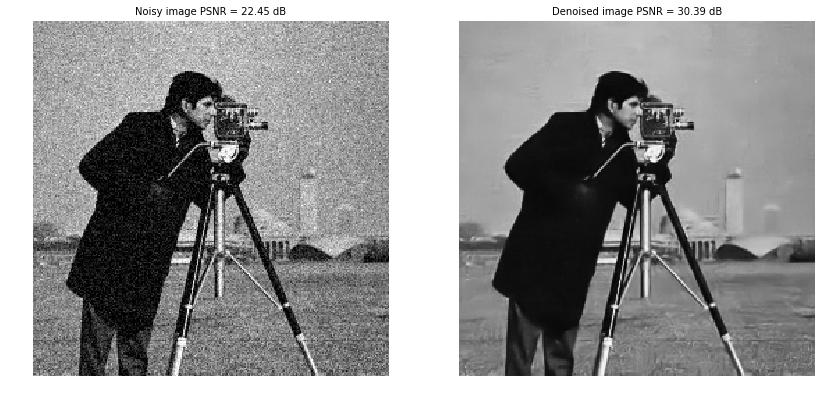

In [4]:
reference_image = '../testdata/cameraman.png'

sigma = 20
img_ref = skimage.io.imread(reference_image)
img_n = utils.addNoise(img_ref, sigma)


im_out = denoiser.run(img_n, sigma)

_, psnr_n =  utils.mse_psnr(img_ref, img_n)
_, psnr_d =  utils.mse_psnr(img_ref, im_out)

visualize_image(img_n, im_out, psnr_n, psnr_d)

skimage.io.imsave('cameraman_out.png', np.uint8(im_out*255+0.5))



## Sample 3: denoising a color image 

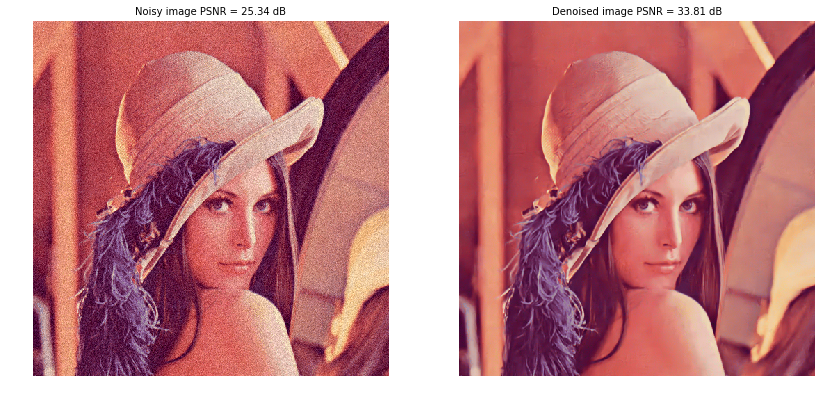

In [5]:
reference_image = '../testdata/lena_color.png'
noisy_image = '../testdata/lena_noisy_s12.png'

sigma = 12
img_ref = skimage.io.imread(reference_image)
img_n = skimage.io.imread(noisy_image)

im_out = denoiser.run(img_n, sigma)

_, psnr_n =  utils.mse_psnr(img_ref, img_n)
_, psnr_d =  utils.mse_psnr(img_ref, im_out)

visualize_image(img_n, im_out, psnr_n, psnr_d)

skimage.io.imsave('lena_out.png', np.uint8(im_out*255+0.5))


## Sample 4: denoising a grayscale image 


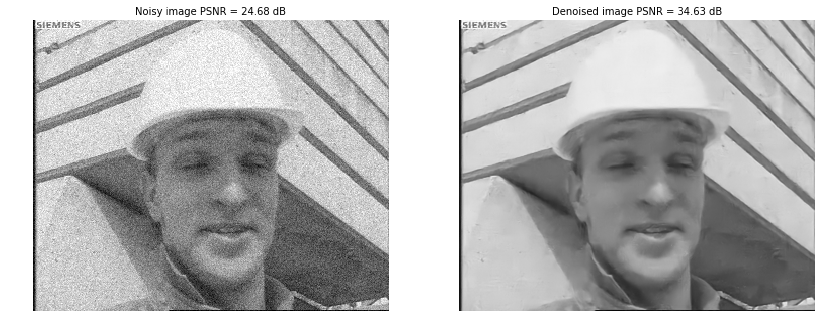

In [6]:
reference_image = '../testdata/foreman.png'
noisy_image = '../testdata/foreman_noisy_s15.png'

sigma = 15
img_ref = skimage.io.imread(reference_image)
img_n = skimage.io.imread(noisy_image)

im_out = denoiser.run(img_n, sigma)

_, psnr_n =  utils.mse_psnr(img_ref, img_n)
_, psnr_d =  utils.mse_psnr(img_ref, im_out)

visualize_image(img_n, im_out, psnr_n, psnr_d)

skimage.io.imsave('foreman_out.png', np.uint8(im_out*255+0.5))
